In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

%matplotlib inline

В данной работе я решил использовать Beta распределение https://en.wikipedia.org/wiki/Beta_distribution
Задаем параметры для распределения:

In [2]:
alpha = 2.
beta = 2.
size = 1000

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

/Users/kirill/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


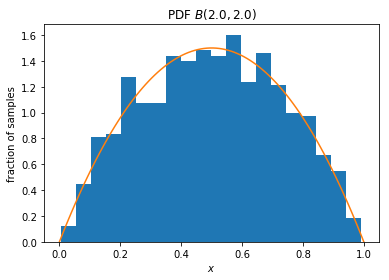

In [3]:
pd = sts.beta(alpha, beta)

sample = pd.rvs(1000)
x = np.linspace(0, 1, 100)

plt.hist(sample, normed=True, bins=20)
plt.plot(x, pd.pdf(x))
plt.title("PDF $B(2.0, 2.0)$")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show()

Функция, которая создает массив из 1000 элементов. Каждый элемент которого это средние из bucket_size элементов распределения:

In [4]:
def create_experement(bucket_size):
    res = []
    for i in range(size):
        res.append(np.mean(sts.beta.rvs(alpha, beta, size=bucket_size)))
    return res

Создаем массив с эксперементами:

In [5]:
buckets_size = [5,10,50]
experiments = [create_experement(x) for x in buckets_size]

Считаем среднее и дисперсию для заданной функции:

In [6]:
x = np.linspace(-0.5,1.5,1000)
m = alpha / (alpha + beta)
var = (alpha * beta) / (((alpha + beta)** 2) * (alpha + beta + 1))

Для каждого эксперимента строим отдельный график:

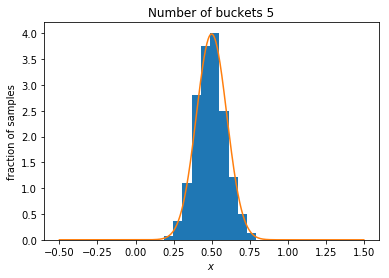

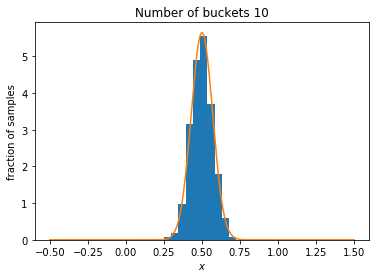

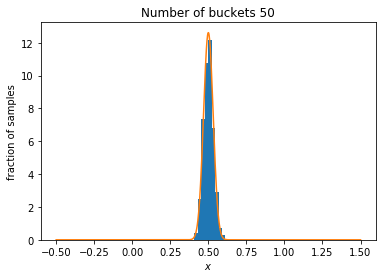

In [7]:
count = 0
for experiment in experiments:
    norm_rv = sts.norm(loc=m, scale=math.sqrt(var / buckets_size[count]))
    y = norm_rv.pdf(x)
    plt.title("Number of buckets " + str(buckets_size[count]))
    plt.hist(experiment, normed=True)
    plt.plot(x, y)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.show()
    count += 1

Вывод:
В целом уже для объема 5 визуально видно, что распределения совпадают, но для большего значения 50 это более очевидно.